### Imports

In [1]:
from IPython.display import Image, display

### Deployment DEMO

### CI/CD and Deployment Strategies with Kubernetes

#### GitHub Actions:

GitHub Actions can be integrated for continuous integration and continuous deployment (CI/CD) with Kubernetes. CI/CD pipelines automate the testing, building, and deployment of applications, ensuring a smooth and efficient development lifecycle.

**Example Workflow:**

A GitHub Actions workflow for a machine learning service could include:

```yaml
name: ML CI/CD

on:
  push:
    branches:
      - main

jobs:
  build:
    runs-on: <your-machine-on-kubernetes>

    steps:
    - name: Checkout repository
      uses: actions/checkout@v2

    - name: Build Docker image
      run: docker build -t ml-service:latest .

    - name: Push to Docker registry
      run: docker push your-docker-registry/ml-service:latest

    - name: Deploy to Kubernetes
      run: kubectl apply -f kubernetes-deployment.yaml
```

#### Deployment Strategies:

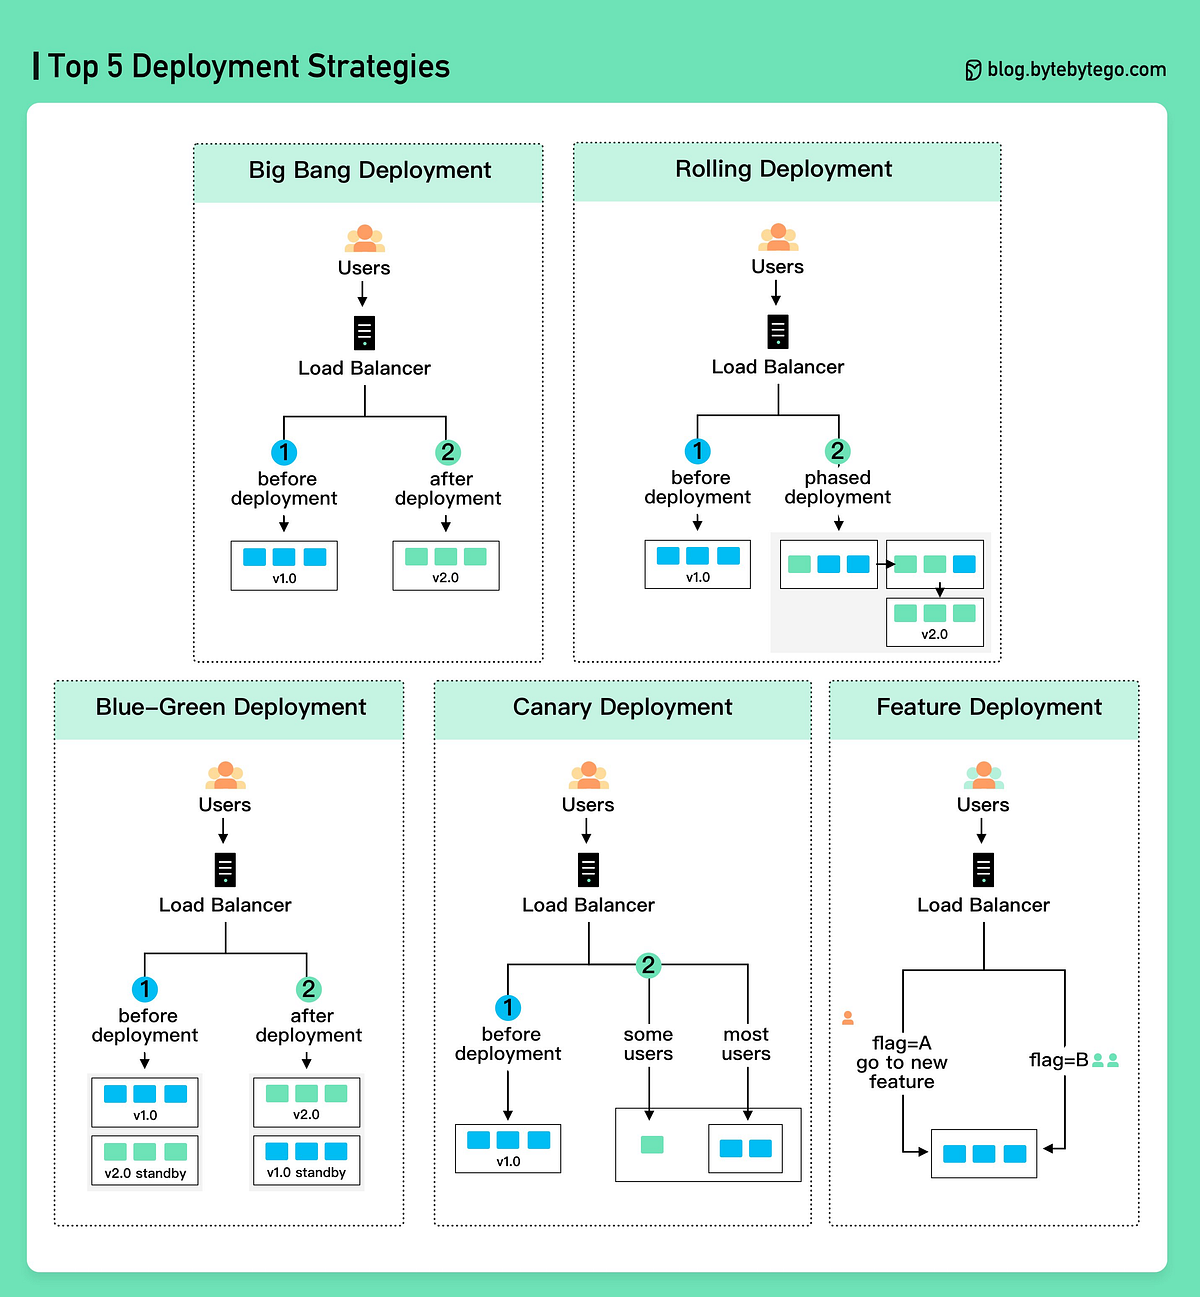

In [2]:
file = '../img/deployment_strategy.png'
display(Image(filename=file, embed=True, width=1000, height=800))

[Deployment strategies with Examples](https://spacelift.io/blog/kubernetes-deployment-strategies)

### Services and Load Balancing

#### Services in Kubernetes:

In Kubernetes, services provide a stable endpoint for communication between different parts of an application, often pods. This abstraction facilitates load balancing and allows for a decoupling of microservices within a system.

**Example:**

Consider a machine learning application where multiple pods are running an image classification service. Creating a Kubernetes service allows these pods to be accessed through a single, stable endpoint, enabling other components to communicate with the service without worrying about the specific pods.

```yaml
apiVersion: v1
kind: Service
metadata:
  name: image-classification-service
spec:
  selector:
    app: image-classification
  ports:
    - protocol: TCP
      port: 80
      targetPort: 5000
```

In this example, the service named `image-classification-service` routes traffic to pods labeled with `app: image-classification` on port 5000.

#### Services and Ingress [For Advanced Users]

[Kubernetes Services & Networking](https://kubernetes.io/docs/concepts/services-networking/)

#### Load Balancing:

Kubernetes services come with built-in load balancing. When there are multiple pods behind a service, Kubernetes automatically distributes incoming traffic evenly among the available pods.

### Seldon explained

#### Introduction

[Seldon](https://www.seldon.io/) is a platform that specializes in deploying and managing machine learning models efficiently. Its primary goal is to make it easier for data scientists and engineers to take their trained models and seamlessly deploy them into production environments.

#### Key Features

Seldon offers a straightforward approach to containerize machine learning (ML) models, providing various options such as pre-packaged inference servers, custom servers, and language wrappers.


- **Out-of-the-Box Endpoints:**
  - Endpoints are readily available and can be tested using Swagger UI, Seldon Python Client, or tools like Curl/GRPCurl.

- **Cloud Agnostic:**
  - Tested and compatible with various cloud platforms including AWS EKS, Azure AKS, Google GKE, Alicloud, Digital Ocean, and Openshift.

- **Powerful Inference Graphs:**
  - Build sophisticated inference graphs with components like predictors, transformers, routers, combiners, and more.

- **Metadata Provenance:**
  - Ensure traceability of each model back to its training system, data, and metrics through metadata provenance.

- **Advanced Metrics:**
  - Customize and utilize advanced metrics, seamlessly integrating with Prometheus and Grafana for comprehensive monitoring.

- **Auditability:**
  - Achieve full auditability with model input-output request logging, integrating with Elasticsearch for secure and traceable logs.

- **Distributed Tracing:**
  - Implement microservice distributed tracing using Jaeger to gain insights into latency across various microservice hops.

- **Security and Reliability:**
  - Maintain a secure, reliable, and robust system with Seldon's consistent security and updates policy.


###### Seldon vs. Competitors

**1. TensorFlow Serving:**
   - TensorFlow Serving is more focused on serving models built using the TensorFlow framework. Seldon, on the other hand, provides broader support for various machine learning frameworks.

**2. Kubernetes-Based Solutions:**
   - Seldon's utilization of Kubernetes provides it with scalability and flexibility. It simplifies the deployment process by leveraging Kubernetes features for orchestration, making it comparable to other Kubernetes-based solutions.

**3. AWS SageMaker:**
   - Seldon is framework-agnostic, allowing users to deploy models trained with different frameworks. AWS SageMaker, while powerful, is tightly integrated with the AWS ecosystem, limiting flexibility for users who may prefer a more diverse technology stack.


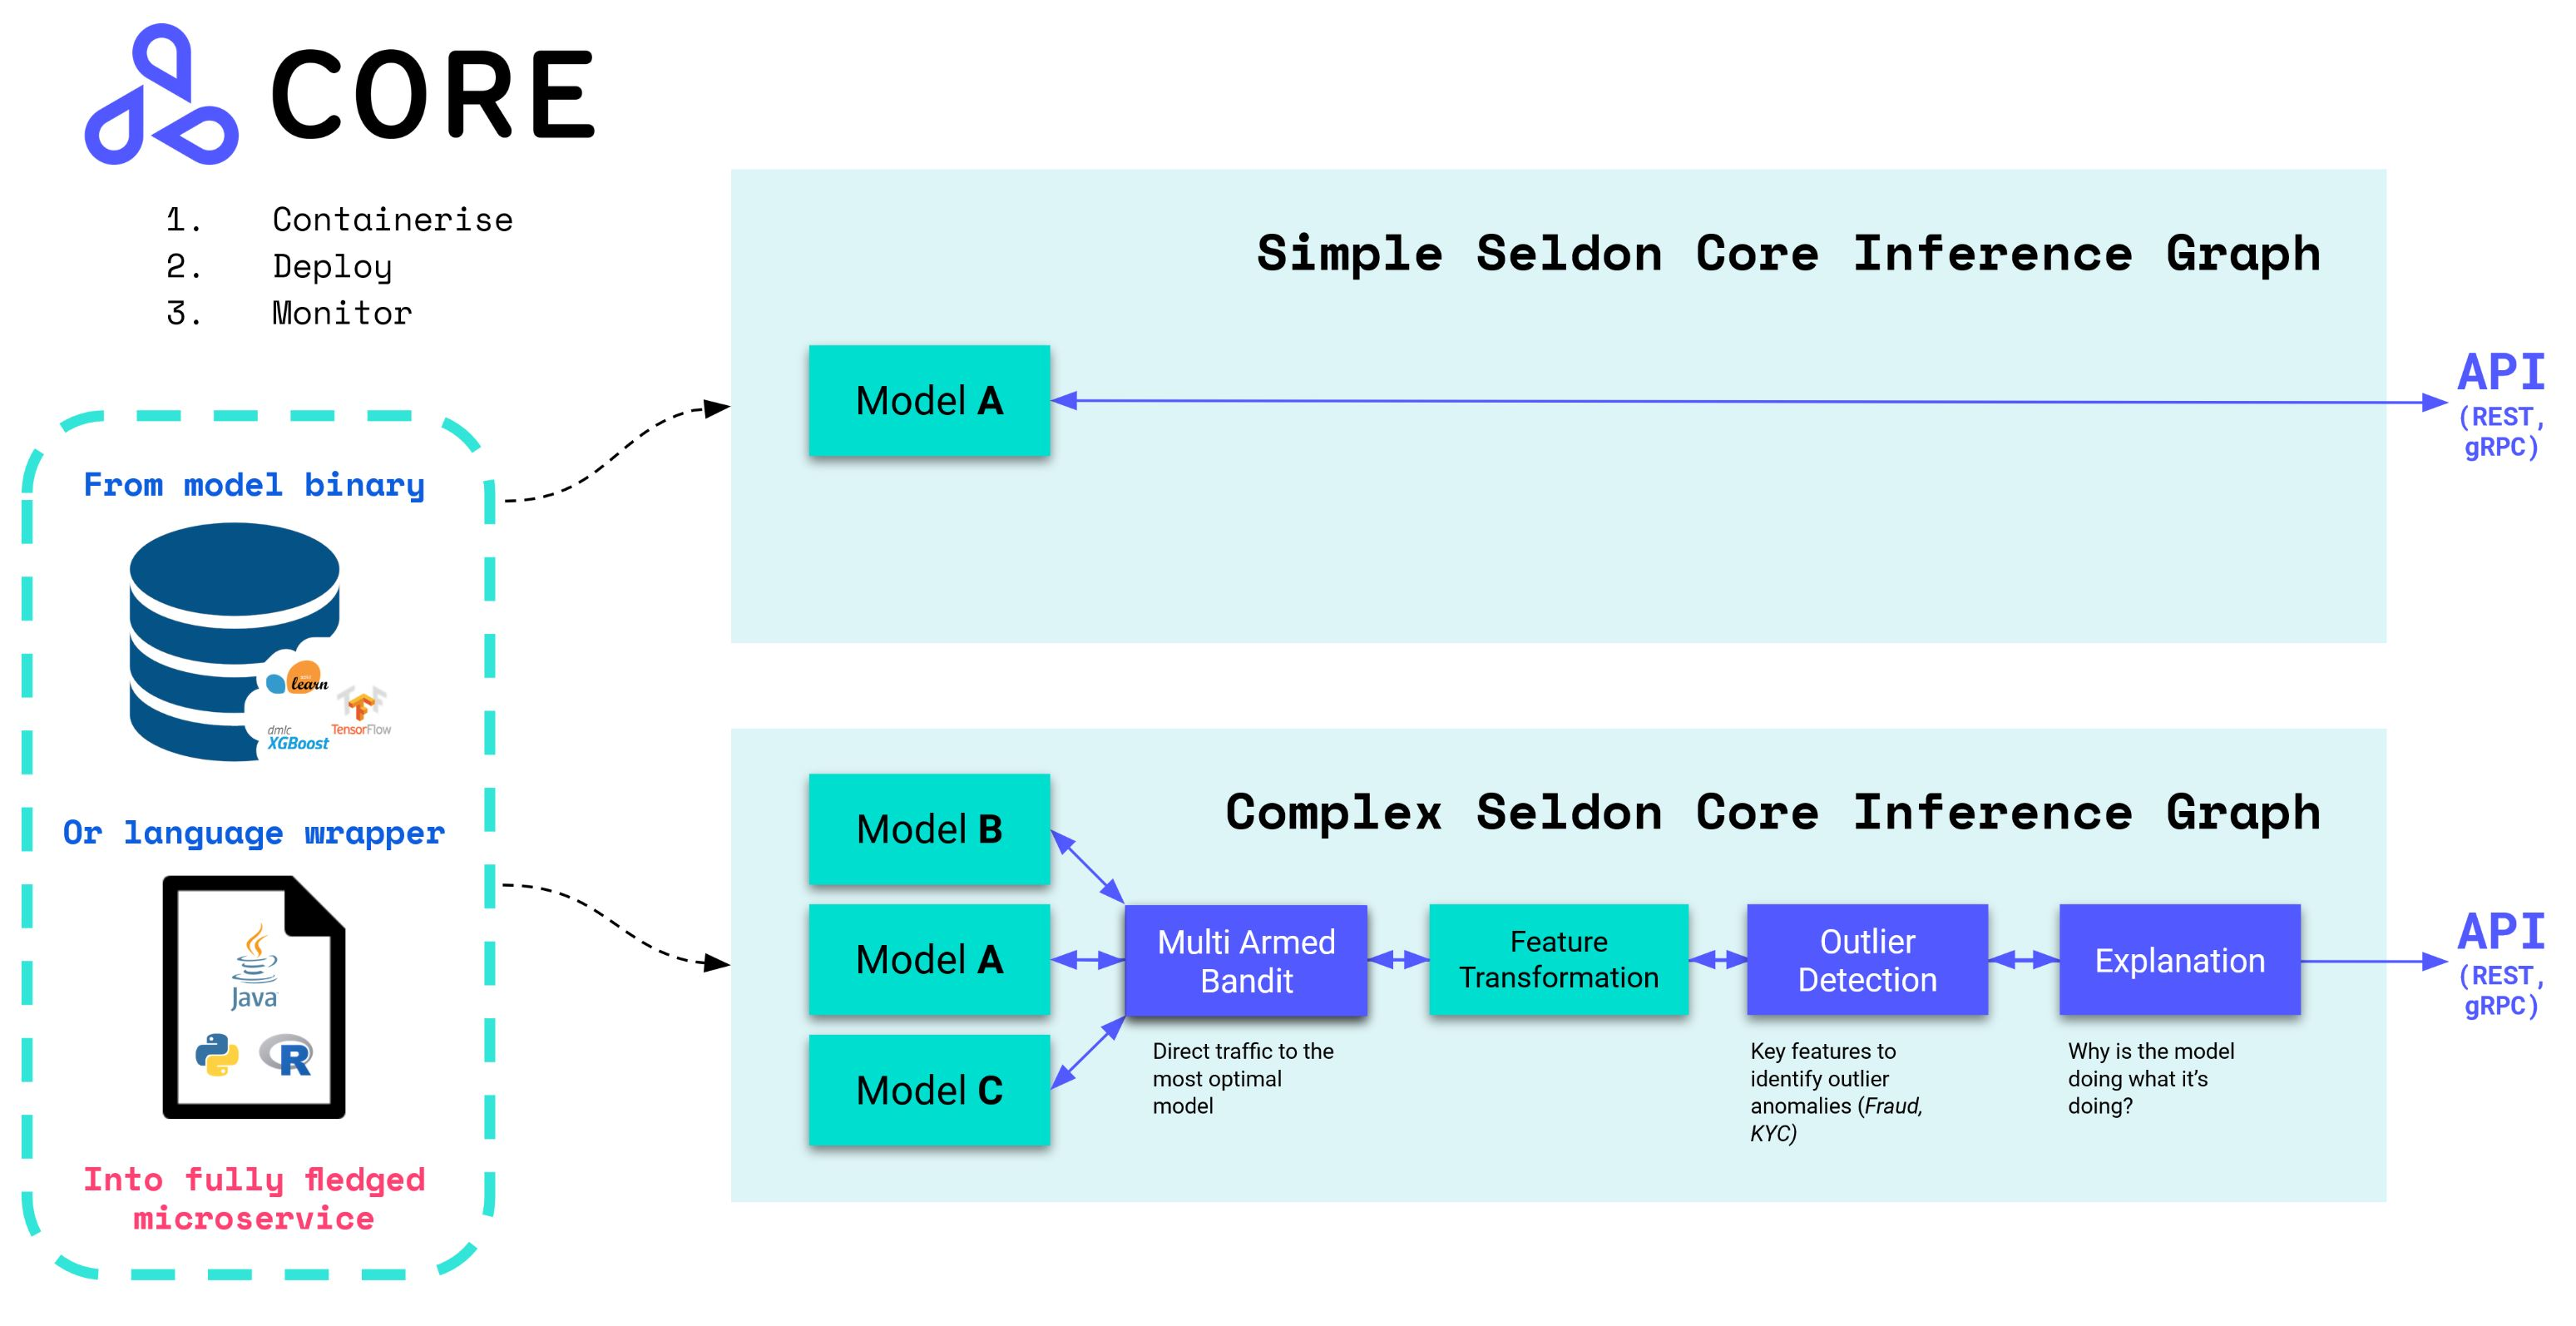

In [5]:
file = '../img/seldon-core-high-level.jpg'
display(Image(filename=file, embed=True, width=1000, height=800))

#### Prerequisites:

1. Ensure you have a Kubernetes cluster set up. You can use tools like Minikube or kind for local testing.
2. Install `kubectl` for interacting with your Kubernetes cluster.
3. Install `helm` for deploying applications on Kubernetes.

#### Step 1: Install Seldon Core using Helm

```bash
# Add the Seldon Core Helm repository
helm repo add seldon https://storage.googleapis.com/seldon-charts

# Update Helm repositories
helm repo update

# Install Seldon Core Operator
kubectl create namespace seldon-system
helm install seldon-core seldon/seldon-core-operator --namespace seldon-system
```

#### Step 2: Define a Simple Machine Learning Model

Create a Python script for a simple model, e.g., `my_model.py`:

```python
# my_model.py
# Save your final model after all the training and hyper parameter tuning
```
Push your model to S3 or Google store, say `gs://seldon-models/v1.18.0-dev/sklearn/iris/model.joblib`

#### Step 4: Define a Seldon Deployment

```yaml
apiVersion: machinelearning.seldon.io/v1
kind: SeldonDeployment
metadata:
  name: iris-model
  namespace: seldon
spec:
  name: iris
  predictors:
  - graph:
      implementation: SKLEARN_SERVER
      modelUri: gs://seldon-models/v1.18.0-dev/sklearn/iris
      name: classifier
    name: default
    replicas: 1
```

#### Step 5: Deploy the Seldon Deployment

```bash
kubectl apply -f seldon_deployment.yaml
```

### Seldon vs EKS vs K8s


| Feature/Aspect             | Kubernetes                   | Seldon                                      | AWS EKS                           |
|---------------------------|------------------------------|---------------------------------------------|-----------------------------------|
| **Container Orchestration**| General-purpose platform     | Specialized for ML model deployment         | Managed Kubernetes Service       |
| **Resource Management**    | Manages containers and services | Manages ML model deployment and serving   | Managed Kubernetes Service       |
| **Declarative Configuration** | YAML manifests              | YAML manifests                              | YAML manifests                   |
| **Scaling**                | Horizontal scaling           | Horizontal scaling for ML models            | Horizontal scaling               |
| **Scope**                  | General-purpose              | Specialized for ML deployment and serving   | Managed Kubernetes Service       |
| **Abstraction Level**      | Lower-level                  | Higher-level for ML models                  | Managed Service with Abstractions |
| **Machine Learning Focus** | N/A                          | Specialized for ML model serving            | Integration with broader AWS ML ecosystem |
| **Predictive Analytics**   | N/A                          | Provides insights into model behavior       | N/A (Not a primary focus)         |
| **Managed Service**        | No (Self-managed clusters)   | No (Self-managed within Kubernetes)         | Yes (Fully managed by AWS)       |
| **Ecosystem Integration**  | Extensible ecosystem          | Specialized for ML model deployment         | Integration with broader AWS services |


### Building Automated Retraining Pipelines with Kubeflow Pipelines and Airflow

Kubeflow Pipelines and Apache Airflow are robust tools for orchestrating and automating machine learning workflows. This tutorial guides beginner students through the process of designing automated retraining pipelines using Kubeflow Pipelines and compares certain aspects with Apache Airflow.

#### Prerequisites

Before starting, make sure you have the following installed:

- [Docker](https://docs.docker.com/get-docker/)
- [Minikube](https://minikube.sigs.k8s.io/docs/start/)
- [Kubeflow Pipelines](https://kubeflow-pipelines.readthedocs.io/en/latest/)
- [Apache Airflow](https://airflow.apache.org/docs/apache-airflow/stable/)

#### Part 1: Kubeflow Pipelines

##### Set Up Kubeflow Pipelines on Minikube

Ensure Minikube is running, and Kubeflow Pipelines is installed:

```bash
minikube start
export PIPELINE_VERSION=2.0.5 # Use SET for Windows
kubectl apply -k "github.com/kubeflow/pipelines/manifests/kustomize/cluster-scoped-resources?ref=$PIPELINE_VERSION"
kubectl wait --for condition=established --timeout=60s crd/applications.app.k8s.io
kubectl apply -k "github.com/kubeflow/pipelines/manifests/kustomize/env/platform-agnostic-pns?ref=$PIPELINE_VERSION"
```

##### Create a Simple Kubeflow Pipeline (dummy code, will not run, separate notebook shared)

```python
import kfp
from kfp import dsl
from kfp.components import func_to_container_op, InputPath

def train_model(input_data: InputPath(), model_output: str):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from joblib import dump

    # Load the training data
    data = pd.read_csv(input_data)

    # Assume the last column is the target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Save the trained model
    dump(model, model_output)

@dsl.pipeline(name='Retraining Pipeline', description='A classification model retraining pipeline')
def retraining_pipeline(input_data: str, model_output: str):
    # Training step
    train_step = func_to_container_op(train_model)(
        input_data=input_data,
        model_output=model_output
    )

if __name__ == '__main__':
    kfp.compiler.Compiler().compile(retraining_pipeline, 'retraining_pipeline.yaml')
```


- The script defines a Kubeflow Pipelines pipeline for retraining a classification model using scikit-learn.
- The `train_model` function loads the training data, splits it, and trains a RandomForestClassifier, saving the trained model.
- The pipeline (`retraining_pipeline`) specifies the input data and model output paths and includes the training step.

Remember to run this script using a Python environment with Kubeflow Pipelines and the required dependencies installed.

##### Run the Kubeflow Pipeline

Navigate to the Kubeflow Pipelines dashboard and upload your pipeline

##### Parameterize and Version Control

Make your pipeline more dynamic by parameterizing components and version controlling your pipeline code. This ensures reproducibility and flexibility.

#### Part 2: Apache Airflow

##### Set Up Apache Airflow

Install Apache Airflow using `pip`:

```bash
pip install apache-airflow
```

Initialize the Airflow database:

```bash
airflow db init
```

##### Create an Airflow DAG for Retraining

Create a Python script for an Airflow DAG, e.g., `retraining_dag.py`. Define your DAG, tasks, and dependencies.

```python
# retraining_dag.py
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.dummy_operator import DummyOperator
from airflow.operators.python_operator import PythonOperator

def train_model():
    # Implement your training logic here
    pass

def retrain_model():
    # Implement your retraining logic here
    pass

default_args = {
    'owner': 'user',
    'start_date': datetime(2024, 1, 1),
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

dag = DAG(
    'retraining_dag',
    default_args=default_args,
    description='A simple ML retraining DAG',
    schedule_interval=timedelta(days=1),
)

start = DummyOperator(task_id='start', dag=dag)
end = DummyOperator(task_id='end', dag=dag)

train_task = PythonOperator(
    task_id='train_model',
    python_callable=train_model,
    dag=dag,
)

retrain_task = PythonOperator(
    task_id='retrain_model',
    python_callable=retrain_model,
    dag=dag,
)

start >> train_task >> retrain_task >> end
```

##### Run the Airflow DAG

```bash
airflow dags trigger retraining_dag
```

Monitor the DAG's progress using the Airflow web UI.

#### Comparison

#### Flexibility and Extensibility

- **Kubeflow Pipelines:** Easily integrates with Kubernetes for scalable and containerized execution.
  
- **Airflow:** Offers flexibility in defining workflows and supports various executors (LocalExecutor, CeleryExecutor, KubernetesExecutor).

#### Visualization

- **Kubeflow Pipelines:** Provides a visual interface for pipeline design and monitoring.

- **Airflow:** Offers a web-based UI to visualize and monitor DAGs.

#### Version Control

- **Kubeflow Pipelines:** Code versioning can be handled using Git, ensuring reproducibility.

- **Airflow:** DAG code can be version-controlled using Git.

#### Community and Ecosystem

- **Kubeflow Pipelines:** Strong integration with the Kubernetes ecosystem and a growing community.

- **Airflow:** Established and active community, extensive library of pre-built operators.

#### Conclusion

Both Kubeflow Pipelines and Apache Airflow are powerful tools for orchestrating machine learning workflows. Choose the one that best fits your requirements, considering factors like integration with existing infrastructure, ease of use, and community support.